In [1]:
# Importing matplotlib, "in line"
%matplotlib inline

In [2]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [3]:
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [4]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

In [5]:
# Create a Quantum Register for 2 Qubits (Quantum Bits), with a Total of 4 (2^2) Possible Processed States
qr = QuantumRegister(2)

# Create a Classical Register for 2 Bits (Classical Bits), with a Total of 2 Possible Processed States
cr = ClassicalRegister(2)

# Create a Quantum Circuit, with the two previously created Quantum and Classical Registers
qc = QuantumCircuit(qr,cr)

In [6]:
# Let's setup the set of necessary instructions, in order to build a Quantum Circuit,
# that implements a Quantum Entangled State in Quantum System with 2 Qubits (Quantum Bits),
# in which if a Qubit it's measured, independently of its outcome, the other Qubit (Quantum Bit)
# will collapse automatically, no matter the distance that separates the both Qubits (Quatum Bits),
# holding the opposite outcome, i.e., what's it's called, the Pauli Exclusion Principle,
# in Quantum Physics/Mechanics

# Per example:
# a) If the 1st Qubit (Quantum Bit) it's measured and collapse to the Classical State |0>,
#    it's possible to state with certainty that the 2nd Qubit (Quantum Bit) will also collapse to
#    the opposite Classical State |1>, for sure;

# b) If the 1st Qubit (Quantum Bit) it's measured and collapse to the Classical State |1>,
#    it's possible to state with certainty that the 2nd Qubit (Quantum Bit) will also collapse to
#    the opposite Classical State |0>, for sure;

# Note:
# - The observations derived from this experiment it's also valid, following the same idea,
#   when the 2nd Qubit (Quantum Bit) it's measured instead of the 1st Qubit (Quantum Bit)

# Any Quantum Entanglement of States, it's implemented using the CX/CNOT Quantum Logic Gate
# (Controlled-X/Controlled-NOT), which acts on 2 Qubits (Quantum Bits), described as the following:
# - 1) Control Qubit (Quantum Bit);
# - 2) Target Qubit (Quantum Bit);

# This CX/CNOT Quantum Logic Gate (Controlled-X/Controlled-NOT) it's simple and 
# has the following behaviour:
# - If the Control Qubit (Control Quantum Bit) it's set as |1>,
#   performs the Pauli-X Quantum Logic Gate Operator (X Quantum Logic Gate Operator)
#   onto the the Target Qubit (Target Quantum Bit);
# - Otherwise, if the Control Qubit (Control Quantum Bit) it's set as |0>,
#   don't perform any Quantum Logic Gate Operator (X Quantum Logic Gate Operator)
#   onto the the Target Qubit (Target Quantum Bit), letting it unchanged;

# The CX/CNOT Quantum Logic Gate (Controlled-X/Controlled-NOT) has a behaviour practically equal to a
# XOR Classical Logic Gate Operator (eXclusive OR Classical Logic Gate Operator):
# - CNOT x |q1,q2> = |q1, (q1 ⊕ q2)>;

# Note:
# - In Mathematics, the XOR Classical Logic Gate Operator (eXclusive OR Classical Logic Gate Operator)
#   it's represented by the Modulo 2 Arithmetic Addition Operator
#   (i.e., represented by the mathematically notation of ⊕);

# Initially, the Quantum Circuit has the both Qubits (Quantum Bits) set as |0>,
# thus the Quantum Circuit, it's represented as the Tensor Product of that two Qubits (Quantum Bits),
# forming a new Quantum State defined as |00>:
# - |Ψ> = |q1>|q2> = |0>|0> = |0> ⊗ |0> = |00>;

# Steps to build this Quantum Circuit:

#   1) Initially, let's set the 2nd Qubit (Quantum Bit),
#      acting as the Control Qubit (Control Quantum Bit) as |1>,
#      applying the Pauli-X Quantum Logic Quantum Gate Operator;
qc.x(1)

#   2) Let's apply a Barrier to it, in order to, ensure that all the
#      previous Quantum Logic Gate Operators are applied correctly;
qc.barrier()

#   3) In order to, explore all the possible situations of this Experiment,
#   let's put the Control Qubit (Control Quantum Bit) in this Quantum Circuit,
#   in a Quantum Superposition of States, applying the Hadamard Quantum Logic Gate Operator to it,
#   letting the Quantum System defined as:
#   - |Ψ> = 1/√2 x (|01> + |11>),
#     where the 1st Qubit (Quantum Bit) it's in Quantum Superposition of States;
qc.h(0)

#   4) In order to, explore all the possible situations of this Experiment,
#   let's put the Control Qubit (Control Quantum Bit) in this Quantum Circuit,
#   in a Quantum Superposition of States, applying the Hadamard Quantum Logic Gate Operator to it,
#   letting the Quantum System defined as:
#   - |Ψ> = 1/√2 x (|01> + |10>), where:
#     - The 1st Qubit (Quantum Bit) it's in Quantum Superposition of States;
#     - The 2nd Qubit (Quantum Bit) it's a result of the Pauli-X Quantum Logic Quantum Gate Operator,
#       in the cases that the Control Qubit (Control Quantum Bit) it's set as |1>, i.e.,
#       the 2nd term of the Quantum System, where |11> => |10>,
#       after being applied the CX/CNOT Quantum Logic Gate (Controlled-X/Controlled-NOT);
qc.cnot(0,1)

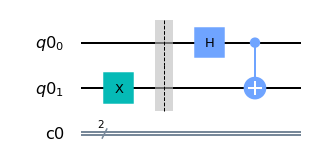

In [7]:
# Draw the Quantum Circuit for the Pauli Exclusion Principle, in a graphically representation
qc.draw()

In [8]:
# Print the Quantum Circuit for the Pauli Exclusion Principle, in a text representation
print(qc)

            ░ ┌───┐     
q0_0: ──────░─┤ H ├──■──
      ┌───┐ ░ └───┘┌─┴─┐
q0_1: ┤ X ├─░──────┤ X ├
      └───┘ ░      └───┘
c0: 2/══════════════════
                        


In [9]:
# Print the Backends available in the Aer Module of the IBM Qiskit Library:
# - The Aer Module, it's the Module responsible for the Simulator of the IBM Qiskit Libraries;
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [10]:
# Getting the Backend for the Unitary Representation
# (i.e., the Quantum State represented as an Unitary Matrix)
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [11]:
array_to_latex(unitary, pretext="\\text{Quantum Circuit (Unitary Matrix) = }\n")

<IPython.core.display.Math object>

In [12]:
# Getting the Backend for the Statevector Representation
# (i.e., the Quantum State represented as State Vector)
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()

In [13]:
array_to_latex(final_state, pretext="\\text{Quantum Circuit (Statevector) = }\n", precision = 1)

<IPython.core.display.Math object>

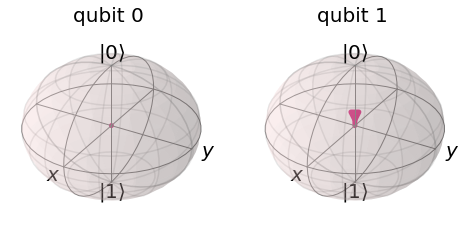

In [14]:
# Plot the Bloch Spheres of the previously defined Quantum System (or, try it...),
# representing a Pauli Exclusion Principle

# Note:
# - In fact it's not possible to plot Bloch Spheres representing a whole Quantum System,
#   which it's currently in a Quantum Entanglement of States, in IBM Qiskit;
plot_bloch_multivector(final_state)

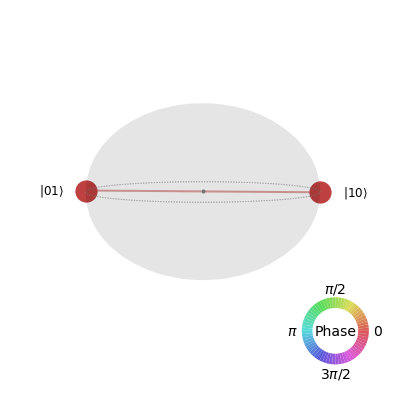

In [15]:
# But, it's possible to plot the Q-Sphere of this Quantum Circuit
# (a "linear" combination of the several Bloch Spheres, involved) of
# the previously defined Quantum System, representing the Pauli Exclusion Principle
plot_state_qsphere(final_state)

In [16]:
# Now, that the Quantum Circuit it's practically defined, let's apply a Barrier to it, in order to,
# ensure that all the previous Quantum Logic Gate Operators are applied correctly
qc.barrier()

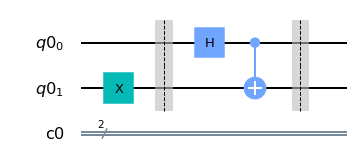

In [17]:
# Draw the Quantum Circuit again, after the Barrier be applied in it
qc.draw()

In [18]:
# Measure the State of the both Qubits (Quantum Bits), contained in the Quantum Circuit
qc.measure(0,0)
qc.measure(1,1)

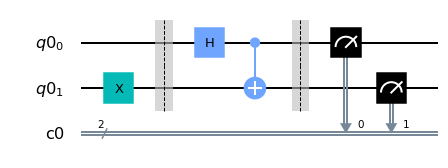

In [19]:
# Draw the Quantum Circuit again, after the Measurement of the States be applied in it
qc.draw()

In [20]:
# Now, let's execute the Quantum Circuit in the QASM Simulator of the Aer Module,
# of the IBM Qiskit Library
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc,backend,shots=2048).result().get_counts()

In [21]:
# Print the Counts of the Frequencies, resulting from this Experiment
print(counts)

{'01': 992, '10': 1056}


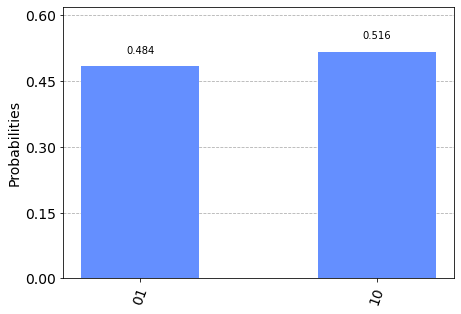

In [22]:
# Plot the Counts of the Frequencies, resulting from this Experiment, through a Histogram
# (i.e., a Distribution of the Probabilities)
plot_histogram(counts)

In [23]:
# Import the IBM Q Experience, from the IBM Qiskit Library
from qiskit import IBMQ

In [24]:
# Update your account info saved locally
IBMQ.update_account()

Found 1 credentials.
No credentials available for updating could be found. No action will be performed.
Warnings:
The stored account with url "https://auth.quantum-computing.ibm.com/api" is already an IBM Q Experience v2 account.


In [25]:
# Run everytime to load your account info saved locally
IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-08-31 22:31:18,861: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
# Get a Provider, from the IBM Q Hub
provider = IBMQ.get_provider(hub='ibm-q')

In [27]:
# Print available Backends, from the Provider set before 
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [28]:
# Import the "Least Busy" function, in order to get a "Least Busy" Backend
from qiskit.providers.ibmq import least_busy

In [29]:
# Filter the available Backends, in order to get a list of "Large Enough Real Quantum Devices",
# i.e., containing 2 or more 2 Qubits (Quantum Bits)
large_enough_devices = provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and
                                                   not b.configuration().simulator
                                                   and b.status().operational==True)

In [30]:
# Or, select the "Least Busy" Backend, from the list of "Large Enough Real Quantum Devices"
backend = least_busy(large_enough_devices)

In [31]:
# Print the Best Backend available (i.e., the Least Busy Backend)
print("The Best Backend is: " + backend.name())

The Best Backend is: ibmqx2


In [32]:
# Execute a Job for this Quantum Circuit, executing the Experiment, for 8192 Shots
job_exp = execute(qc,backend=backend,shots=8192)

In [33]:
# Get the Experiment Result from the previous executed Job for this Quantum Circuit
exp_result = job_exp.result()

In [34]:
# Get the Measurement Results, from the previous Experiment Result,
# executed by the Job for this Quantum Circuit
exp_measurement_result = exp_result.get_counts(qc)

In [35]:
# Print the Measurement Results, from the previous Experiment Result,
# executed by the Job for this Quantum Circuit
print(exp_measurement_result)

{'00': 740, '01': 4076, '10': 2666, '11': 710}


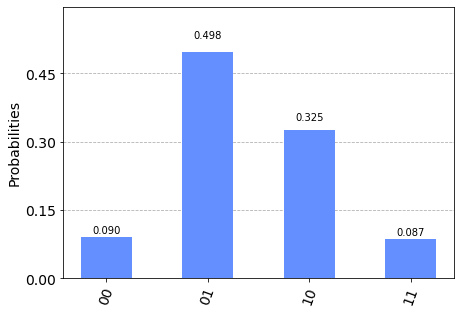

In [36]:
# Plot the Histogram (i.e., Frequencies) for the Measurement Results,
# from the previous Experiment Result, executed by the Job for this Quantum Circuit
plot_histogram(exp_measurement_result)